In [45]:
!pip install matplotlib
!pip install backtrader
!pip install pmdarima

DEPRECATION: pytorch-lightning 1.7.7 has a non-standard dependency specifier torch>=1.9.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: pytorch-lightning 1.7.7 has a non-standard dependency specifier torch>=1.9.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: pytorch-lightning 1.7.7 has a non-standard dependency specifier torch>=1.9.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [94]:
import backtrader as bt
import numpy as np
import pandas as pd
import matplotlib as pt
from pmdarima import auto_arima


In [47]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv('btc_1h.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

In [49]:
df.describe()

,open,high,low,close,volume
count,35664.000000,35664.000000,35664.000000,35664.000000,35664.000000
mean,18808.254711,18919.289572,18688.746828,18808.901597,2275.063464
std,17870.559812,17977.952373,17756.246579,17870.796958,2182.130899
min,3172.620000,3184.750000,3156.260000,3172.050000,0.000000
25%,7135.932500,7166.777500,7098.852500,7136.000000,1062.847381
50%,9531.895000,9577.165000,9486.600000,9531.830000,1659.221319
75%,32700.545000,32933.852500,32397.615000,32703.325000,2704.244858
max,68635.120000,69000.000000,68451.190000,68633.690000,47255.762685


<IPython.core.display.Javascript object>


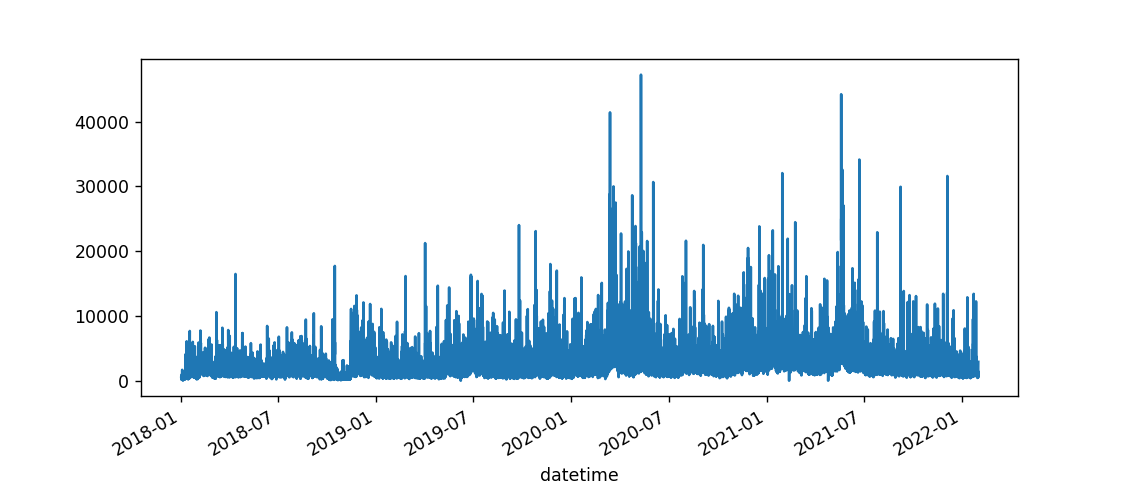

<AxesSubplot:xlabel='datetime'>

In [50]:
df['volume'].plot()


In [62]:
split_date_train = '2021-10-01'
split_date_test = '2022-01-31'
train_data = df[df.index < split_date_train]
test_data = df[(df.index >= split_date_train) & (df.index <= split_date_test)]
print(f'Training set shape: {train_data.shape}')

print(f'Testing set shape: {test_data.shape}')

Training set shape: (32730, 5)
Testing set shape: (2928, 5)


In [83]:
%run strategies1.ipynb

DEPRECATION: pytorch-lightning 1.7.7 has a non-standard dependency specifier torch>=1.9.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [84]:
cerebro = bt.Cerebro()

In [85]:
cerebro.broker.set_cash(10000)
cerebro.addsizer(bt.sizers.FixedSize, stake=1)
cerebro.broker.setcommission(commission=0.001)

In [86]:
data = bt.feeds.PandasData(dataname=test_data)
cerebro.adddata(data)
cerebro.addstrategy(AutoARIMAMeanReversionStrategy)



0

Starting Portfolio Value: 10000.00 USDT
Forecast: 47570.448421052635, Close Price: 47363.68
2021-10-01 20:30:00 - Buy at 47363.68 USDT
Forecast: 47760.18947368421, Close Price: 47559.88
2021-10-01 21:30:00 - Buy at 47559.88 USDT
Forecast: 47821.268421052635, Close Price: 47617.29
2021-10-01 22:30:00 - Buy at 47617.29 USDT
Forecast: 47929.44736842105, Close Price: 47724.18
2021-10-01 23:30:00 - Buy at 47724.18 USDT
Forecast: 48258.185263157895, Close Price: 48030.0
2021-10-02 00:30:00 - Buy at 48030.00 USDT
Forecast: 48319.24526315789, Close Price: 48090.42
2021-10-02 01:30:00 - Buy at 48090.42 USDT
Forecast: 48606.294210526314, Close Price: 48344.93
2021-10-02 02:30:00 - Buy at 48344.93 USDT
Forecast: 48230.74789473684, Close Price: 48001.0
2021-10-02 03:30:00 - Buy at 48001.00 USDT
Forecast: 48379.325263157894, Close Price: 48141.61
2021-10-02 04:30:00 - Buy at 48141.61 USDT
Forecast: 48026.540526315795, Close Price: 47817.73
2021-10-02 05:30:00 - Buy at 47817.73 USDT
Forecast: 47933.

Forecast: 49989.186648897245, Close Price: 49919.99
2021-10-05 13:30:00 - Buy at 49919.99 USDT
Forecast: 50457.536395878924, Close Price: 50269.35
2021-10-05 14:30:00 - Buy at 50269.35 USDT
Forecast: 49981.20508295733, Close Price: 49999.99
2021-10-05 15:30:00 - Buy at 49999.99 USDT
Forecast: 49871.02633106556, Close Price: 49877.06
2021-10-05 16:30:00 - Buy at 49877.06 USDT
Forecast: 50000.0, Close Price: 50000.0
2021-10-05 17:30:00 - Buy at 50000.00 USDT
Forecast: 50207.96, Close Price: 50207.96
2021-10-05 18:30:00 - Buy at 50207.96 USDT
Forecast: 49841.79, Close Price: 49841.79
2021-10-05 19:30:00 - Buy at 49841.79 USDT
Forecast: 49793.57, Close Price: 49793.57
2021-10-05 20:30:00 - Buy at 49793.57 USDT
Forecast: 50103.85, Close Price: 50103.85
2021-10-05 21:30:00 - Buy at 50103.85 USDT
Forecast: 50146.52, Close Price: 50146.52
2021-10-05 22:30:00 - Buy at 50146.52 USDT
Forecast: 50612.44, Close Price: 50612.44
2021-10-05 23:30:00 - Buy at 50612.44 USDT
Forecast: 51277.43157894737, 

Forecast: 54223.7070644356, Close Price: 54156.38
2021-10-09 07:30:00 - Buy at 54156.38 USDT
Forecast: 54511.73718868114, Close Price: 54560.58
2021-10-09 08:30:00 - Buy at 54560.58 USDT
Forecast: 54642.96240765196, Close Price: 54684.62
2021-10-09 09:30:00 - Buy at 54684.62 USDT
Forecast: 54464.66396048874, Close Price: 54597.78
2021-10-09 10:30:00 - Buy at 54597.78 USDT
Forecast: 54611.78286738057, Close Price: 54837.89
2021-10-09 11:30:00 - Buy at 54837.89 USDT
Forecast: 54653.75512704379, Close Price: 54917.55
2021-10-09 12:30:00 - Buy at 54917.55 USDT
Forecast: 54601.69574270515, Close Price: 54728.45
2021-10-09 13:30:00 - Buy at 54728.45 USDT
Forecast: 54787.49286255197, Close Price: 54907.45
2021-10-09 14:30:00 - Buy at 54907.45 USDT
Forecast: 54791.16486695153, Close Price: 54888.99
2021-10-09 15:30:00 - Buy at 54888.99 USDT
Forecast: 54792.68, Close Price: 54792.68
2021-10-09 16:30:00 - Buy at 54792.68 USDT
Forecast: 54979.26, Close Price: 54979.26
2021-10-09 17:30:00 - Buy at

Forecast: 55329.78, Close Price: 55329.78
2021-10-13 00:30:00 - Buy at 55329.78 USDT
Forecast: 55361.08, Close Price: 55361.08
2021-10-13 01:30:00 - Buy at 55361.08 USDT
Forecast: 56074.08, Close Price: 56074.08
2021-10-13 02:30:00 - Buy at 56074.08 USDT
Forecast: 56392.95, Close Price: 56392.95
2021-10-13 03:30:00 - Buy at 56392.95 USDT
Forecast: 55996.93, Close Price: 55996.93
2021-10-13 04:30:00 - Buy at 55996.93 USDT
Forecast: 56459.81, Close Price: 56459.81
2021-10-13 05:30:00 - Buy at 56459.81 USDT
Forecast: 56285.19, Close Price: 56285.19
2021-10-13 06:30:00 - Buy at 56285.19 USDT
Forecast: 56422.36, Close Price: 56422.36
2021-10-13 07:30:00 - Buy at 56422.36 USDT
Forecast: 56328.8566608658, Close Price: 56277.78
2021-10-13 08:30:00 - Buy at 56277.78 USDT
Forecast: 56134.17516038417, Close Price: 56078.11
2021-10-13 09:30:00 - Buy at 56078.11 USDT
Forecast: 55259.87031872108, Close Price: 55011.85
2021-10-13 10:30:00 - Buy at 55011.85 USDT
Forecast: 55607.94907241247, Close Pric

Forecast: 61522.003999999986, Close Price: 60887.55
2021-10-16 19:30:00 - Buy at 60887.55 USDT
Forecast: 61385.77458467535, Close Price: 60941.04
2021-10-16 20:30:00 - Buy at 60941.04 USDT
Forecast: 60782.90926058264, Close Price: 60643.17
2021-10-16 21:30:00 - Buy at 60643.17 USDT
Forecast: 60593.01, Close Price: 60593.01
2021-10-16 22:30:00 - Buy at 60593.01 USDT
Forecast: 61055.65, Close Price: 61055.65
2021-10-16 23:30:00 - Buy at 61055.65 USDT
Forecast: 60834.34, Close Price: 60834.34
2021-10-17 00:30:00 - Buy at 60834.34 USDT
Forecast: 61029.0, Close Price: 61029.0
2021-10-17 01:30:00 - Buy at 61029.00 USDT
Forecast: 60670.18, Close Price: 60670.18
2021-10-17 02:30:00 - Buy at 60670.18 USDT
Forecast: 60795.35, Close Price: 60795.35
2021-10-17 03:30:00 - Buy at 60795.35 USDT
Forecast: 60875.57, Close Price: 60875.57
2021-10-17 04:30:00 - Buy at 60875.57 USDT
Forecast: 60916.18, Close Price: 60916.18
2021-10-17 05:30:00 - Buy at 60916.18 USDT
Forecast: 61077.62, Close Price: 61077.

Forecast: 63937.38166806149, Close Price: 64031.44
2021-10-20 13:30:00 - Buy at 64031.44 USDT
Forecast: 63910.374794703355, Close Price: 64015.24
2021-10-20 14:30:00 - Buy at 64015.24 USDT
Forecast: 63808.518499999984, Close Price: 63829.99
2021-10-20 15:30:00 - Buy at 63829.99 USDT
Forecast: 63847.17592376764, Close Price: 63791.1
2021-10-20 16:30:00 - Buy at 63791.10 USDT
Forecast: 64242.0439073693, Close Price: 64374.29
2021-10-20 17:30:00 - Buy at 64374.29 USDT
Forecast: 66852.31723960579, Close Price: 66040.59
2021-10-20 18:30:00 - Buy at 66040.59 USDT
Forecast: 65350.69009649336, Close Price: 66686.84
2021-10-20 19:30:00 - Sell at 66686.84 USDT
Forecast: 66602.61067378393, Close Price: 66875.83
2021-10-20 20:30:00 - Buy at 66875.83 USDT
Forecast: 65664.13154296478, Close Price: 66449.01
2021-10-20 21:30:00 - Sell at 66449.01 USDT
Forecast: 66363.02, Close Price: 66363.02
2021-10-20 22:30:00 - Buy at 66363.02 USDT
Forecast: 66644.01, Close Price: 66644.01
2021-10-20 23:30:00 - Buy

Forecast: 61119.795499999986, Close Price: 61227.76
2021-10-24 08:30:00 - Buy at 61227.76 USDT
Forecast: 61115.74649999999, Close Price: 60994.06
2021-10-24 09:30:00 - Buy at 60994.06 USDT
Forecast: 61127.36499999999, Close Price: 60900.0
2021-10-24 10:30:00 - Buy at 60900.00 USDT
Forecast: 60702.86, Close Price: 60702.86
2021-10-24 11:30:00 - Buy at 60702.86 USDT
Forecast: 60768.46980708941, Close Price: 60687.82
2021-10-24 12:30:00 - Buy at 60687.82 USDT
Forecast: 60550.90443894115, Close Price: 60526.7
2021-10-24 13:30:00 - Buy at 60526.70 USDT
Forecast: 60799.7, Close Price: 60799.7
2021-10-24 14:30:00 - Buy at 60799.70 USDT
Forecast: 60904.32706073118, Close Price: 60929.18
2021-10-24 15:30:00 - Buy at 60929.18 USDT
Forecast: 60281.0, Close Price: 60281.0
2021-10-24 16:30:00 - Buy at 60281.00 USDT
Forecast: 60390.59, Close Price: 60390.59
2021-10-24 17:30:00 - Buy at 60390.59 USDT
Forecast: 60523.97, Close Price: 60523.97
2021-10-24 18:30:00 - Buy at 60523.97 USDT
Forecast: 60109.

Forecast: 58711.02507724566, Close Price: 58749.13
2021-10-28 03:30:00 - Buy at 58749.13 USDT
Forecast: 58267.18, Close Price: 58413.44
2021-10-28 04:30:00 - Buy at 58413.44 USDT
Forecast: 58109.39105263158, Close Price: 58250.01
2021-10-28 05:30:00 - Buy at 58250.01 USDT
Forecast: 58784.456066102844, Close Price: 58922.56
2021-10-28 06:30:00 - Buy at 58922.56 USDT
Forecast: 58852.0296887327, Close Price: 58924.63
2021-10-28 07:30:00 - Buy at 58924.63 USDT
Forecast: 58846.79399999999, Close Price: 58839.8
2021-10-28 08:30:00 - Buy at 58839.80 USDT
Forecast: 58825.25249999999, Close Price: 58791.13
2021-10-28 09:30:00 - Buy at 58791.13 USDT
Forecast: 58832.098499999986, Close Price: 59057.89
2021-10-28 10:30:00 - Buy at 59057.89 USDT
Forecast: 58874.97127506011, Close Price: 59037.57
2021-10-28 11:30:00 - Buy at 59037.57 USDT
Forecast: 58910.657736171546, Close Price: 58993.71
2021-10-28 12:30:00 - Buy at 58993.71 USDT
Forecast: 60201.4413115267, Close Price: 60560.38
2021-10-28 13:30:0

Forecast: 60670.07, Close Price: 60670.07
2021-10-31 21:30:00 - Buy at 60670.07 USDT
Forecast: 60614.43, Close Price: 60614.43
2021-10-31 22:30:00 - Buy at 60614.43 USDT
Forecast: 60687.010888397905, Close Price: 60705.62
2021-10-31 23:30:00 - Buy at 60705.62 USDT
Forecast: 60674.27999999999, Close Price: 60689.95
2021-11-01 00:30:00 - Buy at 60689.95 USDT
Forecast: 61118.26570282591, Close Price: 60922.36
2021-11-01 01:30:00 - Buy at 60922.36 USDT
Forecast: 61565.49385287292, Close Price: 61444.33
2021-11-01 02:30:00 - Buy at 61444.33 USDT
Forecast: 61214.40714493744, Close Price: 61365.72
2021-11-01 03:30:00 - Buy at 61365.72 USDT
Forecast: 61247.73221865267, Close Price: 61299.8
2021-11-01 04:30:00 - Buy at 61299.80 USDT
Forecast: 61506.64648451718, Close Price: 61560.49
2021-11-01 05:30:00 - Buy at 61560.49 USDT
Forecast: 61244.320926758795, Close Price: 61293.26
2021-11-01 06:30:00 - Buy at 61293.26 USDT
Forecast: 60373.913759180134, Close Price: 60547.0
2021-11-01 07:30:00 - Buy 

Forecast: 61940.9228695714, Close Price: 61789.8
2021-11-04 14:30:00 - Buy at 61789.80 USDT
Forecast: 62007.95729653543, Close Price: 61894.81
2021-11-04 15:30:00 - Buy at 61894.81 USDT
Forecast: 61447.22, Close Price: 61447.22
2021-11-04 16:30:00 - Buy at 61447.22 USDT
Forecast: 61865.06, Close Price: 61865.06
2021-11-04 17:30:00 - Buy at 61865.06 USDT
Forecast: 62092.01, Close Price: 62092.01
2021-11-04 18:30:00 - Buy at 62092.01 USDT
Forecast: 61757.95, Close Price: 61757.95
2021-11-04 19:30:00 - Buy at 61757.95 USDT
Forecast: 61035.01, Close Price: 61035.01
2021-11-04 20:30:00 - Buy at 61035.01 USDT
Forecast: 61166.04, Close Price: 61166.04
2021-11-04 21:30:00 - Buy at 61166.04 USDT
Forecast: 60864.78, Close Price: 60864.78
2021-11-04 22:30:00 - Buy at 60864.78 USDT
Forecast: 60625.71157894737, Close Price: 60739.25
2021-11-04 23:30:00 - Buy at 60739.25 USDT
Forecast: 61249.34, Close Price: 61249.34
2021-11-05 00:30:00 - Buy at 61249.34 USDT
Forecast: 61319.54, Close Price: 61319.5

Forecast: 65336.48684210526, Close Price: 65168.2
2021-11-08 09:30:00 - Buy at 65168.20 USDT
Forecast: 65637.4194736842, Close Price: 65451.74
2021-11-08 10:30:00 - Buy at 65451.74 USDT
Forecast: 66140.24210526315, Close Price: 65928.8
2021-11-08 11:30:00 - Buy at 65928.80 USDT
Forecast: 66161.56105263157, Close Price: 65941.89
2021-11-08 12:30:00 - Buy at 65941.89 USDT
Forecast: 66463.00315789474, Close Price: 66232.0
2021-11-08 13:30:00 - Buy at 66232.00 USDT
Forecast: 66295.39631578948, Close Price: 66069.7
2021-11-08 14:30:00 - Buy at 66069.70 USDT
Forecast: 66236.46263157894, Close Price: 66021.54
2021-11-08 15:30:00 - Buy at 66021.54 USDT
Forecast: 66247.48210526316, Close Price: 66037.21
2021-11-08 16:30:00 - Buy at 66037.21 USDT
Forecast: 65970.87315789473, Close Price: 65794.58
2021-11-08 17:30:00 - Buy at 65794.58 USDT
Forecast: 65532.31368421052, Close Price: 65377.49
2021-11-08 18:30:00 - Buy at 65377.49 USDT
Forecast: 65487.13842105264, Close Price: 65326.06
2021-11-08 19:

Forecast: 65070.74634087521, Close Price: 65160.28
2021-11-12 03:30:00 - Buy at 65160.28 USDT
Forecast: 64904.964261973466, Close Price: 64774.26
2021-11-12 04:30:00 - Buy at 64774.26 USDT
Forecast: 64936.583286879344, Close Price: 64808.14
2021-11-12 05:30:00 - Buy at 64808.14 USDT
Forecast: 65024.49249999998, Close Price: 65103.56
2021-11-12 06:30:00 - Buy at 65103.56 USDT
Forecast: 65034.02749999998, Close Price: 65010.42
2021-11-12 07:30:00 - Buy at 65010.42 USDT
Forecast: 65013.938999999984, Close Price: 64826.63
2021-11-12 08:30:00 - Buy at 64826.63 USDT
Forecast: 64994.609499999984, Close Price: 64978.99
2021-11-12 09:30:00 - Buy at 64978.99 USDT
Forecast: 64959.52899999998, Close Price: 64676.39
2021-11-12 10:30:00 - Buy at 64676.39 USDT
Forecast: 64922.51599999999, Close Price: 64502.41
2021-11-12 11:30:00 - Buy at 64502.41 USDT
Forecast: 64884.12799999998, Close Price: 64488.12
2021-11-12 12:30:00 - Buy at 64488.12 USDT
Forecast: 64878.75699999998, Close Price: 64890.64
2021-

Forecast: 63878.44414016234, Close Price: 64036.99
2021-11-15 22:30:00 - Buy at 64036.99 USDT
Forecast: 63657.900242242424, Close Price: 63812.79
2021-11-15 23:30:00 - Buy at 63812.79 USDT
Forecast: 64181.20157894737, Close Price: 64265.9
2021-11-16 00:30:00 - Buy at 64265.90 USDT
Forecast: 63798.54631578948, Close Price: 63903.43
2021-11-16 01:30:00 - Buy at 63903.43 USDT
Forecast: 63783.60842105263, Close Price: 63878.3
2021-11-16 02:30:00 - Buy at 63878.30 USDT
Forecast: 63898.54473684211, Close Price: 63989.25
2021-11-16 03:30:00 - Buy at 63989.25 USDT
Forecast: 63493.07315789474, Close Price: 63606.74
2021-11-16 04:30:00 - Buy at 63606.74 USDT
Forecast: 62373.90052631579, Close Price: 62540.03
2021-11-16 05:30:00 - Buy at 62540.03 USDT
Forecast: 61922.94684210526, Close Price: 62110.1
2021-11-16 06:30:00 - Buy at 62110.10 USDT
Forecast: 61412.24684210527, Close Price: 61620.62
2021-11-16 07:30:00 - Buy at 61620.62 USDT
Forecast: 60578.89932000964, Close Price: 60907.41
2021-11-16 

Forecast: 56669.26092816077, Close Price: 56882.76
2021-11-19 15:30:00 - Buy at 56882.76 USDT
Forecast: 56987.66294183579, Close Price: 56989.59
2021-11-19 16:30:00 - Buy at 56989.59 USDT
Forecast: 56904.37522393486, Close Price: 56876.39
2021-11-19 17:30:00 - Buy at 56876.39 USDT
Forecast: 57432.63643179678, Close Price: 57605.78
2021-11-19 18:30:00 - Buy at 57605.78 USDT
Forecast: 57722.49694794204, Close Price: 57994.61
2021-11-19 19:30:00 - Buy at 57994.61 USDT
Forecast: 57631.006781524135, Close Price: 57887.98
2021-11-19 20:30:00 - Buy at 57887.98 USDT
Forecast: 57922.85865298923, Close Price: 58151.12
2021-11-19 21:30:00 - Buy at 58151.12 USDT
Forecast: 57971.77, Close Price: 57971.77
2021-11-19 22:30:00 - Buy at 57971.77 USDT
Forecast: 57879.47, Close Price: 57879.47
2021-11-19 23:30:00 - Buy at 57879.47 USDT
Forecast: 58349.45814518051, Close Price: 58033.05
2021-11-20 00:30:00 - Buy at 58033.05 USDT
Forecast: 57933.09580484412, Close Price: 57767.88
2021-11-20 01:30:00 - Buy 

Forecast: 56849.10652684245, Close Price: 56792.04
2021-11-23 09:30:00 - Buy at 56792.04 USDT
Forecast: 56663.63869575201, Close Price: 56556.02
2021-11-23 10:30:00 - Buy at 56556.02 USDT
Forecast: 56514.1514970854, Close Price: 56392.17
2021-11-23 11:30:00 - Buy at 56392.17 USDT
Forecast: 56175.94322592563, Close Price: 56006.74
2021-11-23 12:30:00 - Buy at 56006.74 USDT
Forecast: 56600.931480739244, Close Price: 56274.3
2021-11-23 13:30:00 - Buy at 56274.30 USDT
Forecast: 57003.00641715299, Close Price: 56622.78
2021-11-23 14:30:00 - Buy at 56622.78 USDT
Forecast: 56316.15853274731, Close Price: 56335.53
2021-11-23 15:30:00 - Buy at 56335.53 USDT
Forecast: 56354.08275581695, Close Price: 56149.51
2021-11-23 16:30:00 - Buy at 56149.51 USDT
Forecast: 56501.075112982486, Close Price: 56313.84
2021-11-23 17:30:00 - Buy at 56313.84 USDT
Forecast: 56699.06599894285, Close Price: 56789.71
2021-11-23 18:30:00 - Buy at 56789.71 USDT
Forecast: 57226.783136142585, Close Price: 57677.51
2021-11-

Forecast: 53972.45670345423, Close Price: 54062.75
2021-11-27 03:30:00 - Buy at 54062.75 USDT
Forecast: 53611.90490732216, Close Price: 53726.53
2021-11-27 04:30:00 - Buy at 53726.53 USDT
Forecast: 53885.018421052635, Close Price: 54082.72
2021-11-27 05:30:00 - Buy at 54082.72 USDT
Forecast: 53965.18315789474, Close Price: 54146.25
2021-11-27 06:30:00 - Buy at 54146.25 USDT
Forecast: 54654.34343559026, Close Price: 54374.25
2021-11-27 07:30:00 - Buy at 54374.25 USDT
Forecast: 54318.25095556028, Close Price: 54347.07
2021-11-27 08:30:00 - Buy at 54347.07 USDT
Forecast: 54364.85822904117, Close Price: 54476.58
2021-11-27 09:30:00 - Buy at 54476.58 USDT
Forecast: 54242.294999999984, Close Price: 54250.01
2021-11-27 10:30:00 - Buy at 54250.01 USDT
Forecast: 54170.96854966033, Close Price: 54235.55
2021-11-27 11:30:00 - Buy at 54235.55 USDT
Forecast: 54328.56818147983, Close Price: 54394.56
2021-11-27 12:30:00 - Buy at 54394.56 USDT
Forecast: 54737.898503717224, Close Price: 55055.65
2021-1

Forecast: 57293.2055381453, Close Price: 57238.84
2021-11-30 20:30:00 - Buy at 57238.84 USDT
Forecast: 56942.654173614734, Close Price: 56777.38
2021-11-30 21:30:00 - Buy at 56777.38 USDT
Forecast: 57369.56302477036, Close Price: 57370.94
2021-11-30 22:30:00 - Buy at 57370.94 USDT
Forecast: 57868.73003409533, Close Price: 58319.92
2021-11-30 23:30:00 - Buy at 58319.92 USDT
Forecast: 57526.54505291655, Close Price: 57629.99
2021-12-01 00:30:00 - Buy at 57629.99 USDT
Forecast: 57361.59262726935, Close Price: 57400.41
2021-12-01 01:30:00 - Buy at 57400.41 USDT
Forecast: 57161.85573846052, Close Price: 57097.79
2021-12-01 02:30:00 - Buy at 57097.79 USDT
Forecast: 57265.41055668542, Close Price: 57267.91
2021-12-01 03:30:00 - Buy at 57267.91 USDT
Forecast: 57145.94288107539, Close Price: 56950.56
2021-12-01 04:30:00 - Buy at 56950.56 USDT
Forecast: 57644.47722863178, Close Price: 57577.07
2021-12-01 05:30:00 - Buy at 57577.07 USDT
Forecast: 57117.458641084755, Close Price: 56994.58
2021-12-

Forecast: 46740.2647368421, Close Price: 47242.74
2021-12-04 12:30:00 - Sell at 47242.74 USDT
Forecast: 47007.81052631579, Close Price: 47500.58
2021-12-04 13:30:00 - Sell at 47500.58 USDT
Forecast: 47014.24842105263, Close Price: 47475.49
2021-12-04 14:30:00 - Buy at 47475.49 USDT
Forecast: 46917.63578947368, Close Price: 47370.52
2021-12-04 15:30:00 - Buy at 47370.52 USDT
Forecast: 46041.75789473684, Close Price: 46489.67
2021-12-04 16:30:00 - Buy at 46489.67 USDT
Forecast: 46636.00473684211, Close Price: 47053.32
2021-12-04 17:30:00 - Buy at 47053.32 USDT
Forecast: 46992.55684210527, Close Price: 47387.01
2021-12-04 18:30:00 - Buy at 47387.01 USDT
Forecast: 47511.9552631579, Close Price: 47828.29
2021-12-04 19:30:00 - Buy at 47828.29 USDT
Forecast: 47927.4, Close Price: 48203.73
2021-12-04 20:30:00 - Buy at 48203.73 USDT
Forecast: 47539.44157894737, Close Price: 47842.97
2021-12-04 21:30:00 - Buy at 47842.97 USDT
Forecast: 47969.027368421055, Close Price: 48241.05
2021-12-04 22:30:0

Forecast: 50424.32, Close Price: 50424.32
2021-12-08 06:30:00 - Buy at 50424.32 USDT
Forecast: 50332.01, Close Price: 50332.01
2021-12-08 07:30:00 - Buy at 50332.01 USDT
Forecast: 50110.91, Close Price: 50110.91
2021-12-08 08:30:00 - Buy at 50110.91 USDT
Forecast: 50236.03, Close Price: 50236.03
2021-12-08 09:30:00 - Buy at 50236.03 USDT
Forecast: 50340.28714888852, Close Price: 50404.9
2021-12-08 10:30:00 - Buy at 50404.90 USDT
Forecast: 50613.15, Close Price: 50613.15
2021-12-08 11:30:00 - Buy at 50613.15 USDT
Forecast: 50480.93, Close Price: 50480.93
2021-12-08 12:30:00 - Buy at 50480.93 USDT
Forecast: 50398.30627528058, Close Price: 50411.62
2021-12-08 13:30:00 - Buy at 50411.62 USDT
Forecast: 49994.49313174625, Close Price: 50117.09
2021-12-08 14:30:00 - Buy at 50117.09 USDT
Forecast: 49091.32894736842, Close Price: 49223.47
2021-12-08 15:30:00 - Buy at 49223.47 USDT
Forecast: 49072.194210526315, Close Price: 49186.51
2021-12-08 16:30:00 - Buy at 49186.51 USDT
Forecast: 49147.3594

Forecast: 48664.469597886105, Close Price: 48671.6
2021-12-11 23:30:00 - Buy at 48671.60 USDT
Forecast: 48407.25, Close Price: 48407.25
2021-12-12 00:30:00 - Buy at 48407.25 USDT
Forecast: 48564.07, Close Price: 48564.07
2021-12-12 01:30:00 - Buy at 48564.07 USDT
Forecast: 48782.79, Close Price: 48782.79
2021-12-12 02:30:00 - Buy at 48782.79 USDT
Forecast: 48793.21980618597, Close Price: 48826.36
2021-12-12 03:30:00 - Buy at 48826.36 USDT
Forecast: 49389.99, Close Price: 49389.99
2021-12-12 04:30:00 - Buy at 49389.99 USDT
Forecast: 49326.62, Close Price: 49326.62
2021-12-12 05:30:00 - Buy at 49326.62 USDT
Forecast: 49181.33, Close Price: 49181.33
2021-12-12 06:30:00 - Buy at 49181.33 USDT
Forecast: 49044.38, Close Price: 49044.38
2021-12-12 07:30:00 - Buy at 49044.38 USDT
Forecast: 49305.7, Close Price: 49305.7
2021-12-12 08:30:00 - Buy at 49305.70 USDT
Forecast: 48865.16, Close Price: 48865.16
2021-12-12 09:30:00 - Buy at 48865.16 USDT
Forecast: 48979.22, Close Price: 48979.22
2021-12

Forecast: 47929.24524182751, Close Price: 47652.58
2021-12-15 18:30:00 - Buy at 47652.58 USDT
Forecast: 47709.91777131027, Close Price: 47370.0
2021-12-15 19:30:00 - Buy at 47370.00 USDT
Forecast: 46866.45345730173, Close Price: 46632.31
2021-12-15 20:30:00 - Buy at 46632.31 USDT
Forecast: 47049.75724612851, Close Price: 47004.32
2021-12-15 21:30:00 - Buy at 47004.32 USDT
Forecast: 47086.3, Close Price: 47086.3
2021-12-15 22:30:00 - Buy at 47086.30 USDT
Forecast: 47855.80265209536, Close Price: 47829.99
2021-12-15 23:30:00 - Buy at 47829.99 USDT
Forecast: 48857.206221833956, Close Price: 48674.9
2021-12-16 00:30:00 - Buy at 48674.90 USDT
Forecast: 49297.94240526445, Close Price: 49211.84
2021-12-16 01:30:00 - Buy at 49211.84 USDT
Forecast: 48815.425673125545, Close Price: 49168.89
2021-12-16 02:30:00 - Buy at 49168.89 USDT
Forecast: 48429.09169367924, Close Price: 48747.3
2021-12-16 03:30:00 - Buy at 48747.30 USDT
Forecast: 48756.60335022911, Close Price: 48864.98
2021-12-16 04:30:00 -

Forecast: 47443.11982216919, Close Price: 47515.09
2021-12-19 12:30:00 - Buy at 47515.09 USDT
Forecast: 47491.29264771018, Close Price: 47473.06
2021-12-19 13:30:00 - Buy at 47473.06 USDT
Forecast: 46908.17463400976, Close Price: 47102.02
2021-12-19 14:30:00 - Buy at 47102.02 USDT
Forecast: 47209.73405029377, Close Price: 47125.01
2021-12-19 15:30:00 - Buy at 47125.01 USDT
Forecast: 47098.65320699318, Close Price: 47152.72
2021-12-19 16:30:00 - Buy at 47152.72 USDT
Forecast: 47291.96422333901, Close Price: 47256.64
2021-12-19 17:30:00 - Buy at 47256.64 USDT
Forecast: 47698.96848652165, Close Price: 47629.95
2021-12-19 18:30:00 - Buy at 47629.95 USDT
Forecast: 47130.647188777046, Close Price: 47393.2
2021-12-19 19:30:00 - Buy at 47393.20 USDT
Forecast: 47259.04111728144, Close Price: 47239.8
2021-12-19 20:30:00 - Buy at 47239.80 USDT
Forecast: 47153.30858248327, Close Price: 47162.04
2021-12-19 21:30:00 - Buy at 47162.04 USDT
Forecast: 47190.0299381073, Close Price: 47141.22
2021-12-19 

Forecast: 48764.81407404512, Close Price: 48469.14
2021-12-23 06:30:00 - Buy at 48469.14 USDT
Forecast: 48501.157540651126, Close Price: 48355.4
2021-12-23 07:30:00 - Buy at 48355.40 USDT
Forecast: 48797.96271211702, Close Price: 48524.11
2021-12-23 08:30:00 - Buy at 48524.11 USDT
Forecast: 48479.084554518486, Close Price: 48362.41
2021-12-23 09:30:00 - Buy at 48362.41 USDT
Forecast: 48667.49555831672, Close Price: 48384.52
2021-12-23 10:30:00 - Buy at 48384.52 USDT
Forecast: 48547.40606030268, Close Price: 48468.92
2021-12-23 11:30:00 - Buy at 48468.92 USDT
Forecast: 48228.06571464345, Close Price: 48129.6
2021-12-23 12:30:00 - Buy at 48129.60 USDT
Forecast: 48339.9, Close Price: 48339.9
2021-12-23 13:30:00 - Buy at 48339.90 USDT
Forecast: 48376.94, Close Price: 48376.94
2021-12-23 14:30:00 - Buy at 48376.94 USDT
Forecast: 48434.53, Close Price: 48434.53
2021-12-23 15:30:00 - Buy at 48434.53 USDT
Forecast: 48354.77, Close Price: 48354.77
2021-12-23 16:30:00 - Buy at 48354.77 USDT
Fore

Forecast: 50261.50442307636, Close Price: 50351.1
2021-12-26 23:30:00 - Buy at 50351.10 USDT
Forecast: 50126.88675218359, Close Price: 50342.51
2021-12-27 00:30:00 - Buy at 50342.51 USDT
Forecast: 50143.63200707601, Close Price: 50269.44
2021-12-27 01:30:00 - Buy at 50269.44 USDT
Forecast: 50664.69791452635, Close Price: 50774.16
2021-12-27 02:30:00 - Buy at 50774.16 USDT
Forecast: 51041.96, Close Price: 50973.64
2021-12-27 03:30:00 - Buy at 50973.64 USDT
Forecast: 50775.49, Close Price: 50775.49
2021-12-27 04:30:00 - Buy at 50775.49 USDT
Forecast: 50622.87, Close Price: 50622.87
2021-12-27 05:30:00 - Buy at 50622.87 USDT
Forecast: 50787.94, Close Price: 50787.94
2021-12-27 06:30:00 - Buy at 50787.94 USDT
Forecast: 50816.24, Close Price: 50816.24
2021-12-27 07:30:00 - Buy at 50816.24 USDT
Forecast: 51068.33789473684, Close Price: 51009.02
2021-12-27 08:30:00 - Buy at 51009.02 USDT
Forecast: 51066.140284947185, Close Price: 51001.51
2021-12-27 09:30:00 - Buy at 51001.51 USDT
Forecast: 5

Forecast: 47220.314105047204, Close Price: 47321.49
2021-12-30 18:30:00 - Buy at 47321.49 USDT
Forecast: 47250.790721744524, Close Price: 47345.03
2021-12-30 19:30:00 - Buy at 47345.03 USDT
Forecast: 47114.14479805213, Close Price: 47159.41
2021-12-30 20:30:00 - Buy at 47159.41 USDT
Forecast: 47434.213243553924, Close Price: 47578.69
2021-12-30 21:30:00 - Buy at 47578.69 USDT
Forecast: 47679.65762300745, Close Price: 47663.51
2021-12-30 22:30:00 - Buy at 47663.51 USDT
Forecast: 47934.228421052634, Close Price: 47860.75
2021-12-30 23:30:00 - Buy at 47860.75 USDT
Forecast: 47558.35, Close Price: 47558.35
2021-12-31 00:30:00 - Buy at 47558.35 USDT
Forecast: 47203.16, Close Price: 47203.16
2021-12-31 01:30:00 - Buy at 47203.16 USDT
Forecast: 47300.0, Close Price: 47300.0
2021-12-31 02:30:00 - Buy at 47300.00 USDT
Forecast: 47084.88, Close Price: 47084.88
2021-12-31 03:30:00 - Buy at 47084.88 USDT
Forecast: 47128.35666343687, Close Price: 47120.87
2021-12-31 04:30:00 - Buy at 47120.87 USDT


Forecast: 47171.211120104555, Close Price: 47051.37
2022-01-03 12:30:00 - Buy at 47051.37 USDT
Forecast: 46997.32361615413, Close Price: 46978.82
2022-01-03 13:30:00 - Buy at 46978.82 USDT
Forecast: 47093.78511744186, Close Price: 46984.55
2022-01-03 14:30:00 - Buy at 46984.55 USDT
Forecast: 47115.521633629905, Close Price: 47126.02
2022-01-03 15:30:00 - Buy at 47126.02 USDT
Forecast: 47337.618108779316, Close Price: 47378.0
2022-01-03 16:30:00 - Buy at 47378.00 USDT
Forecast: 47063.54029563983, Close Price: 47194.39
2022-01-03 17:30:00 - Buy at 47194.39 USDT
Forecast: 47105.9867458435, Close Price: 47153.5
2022-01-03 18:30:00 - Buy at 47153.50 USDT
Forecast: 46970.27793323609, Close Price: 46874.53
2022-01-03 19:30:00 - Buy at 46874.53 USDT
Forecast: 46916.4574243196, Close Price: 46693.45
2022-01-03 20:30:00 - Buy at 46693.45 USDT
Forecast: 46586.75916357957, Close Price: 46482.34
2022-01-03 21:30:00 - Buy at 46482.34 USDT
Forecast: 46665.86531681619, Close Price: 46577.15
2022-01-03

Forecast: 43124.40528128434, Close Price: 43008.9
2022-01-07 06:30:00 - Buy at 43008.90 USDT
Forecast: 42888.044412599396, Close Price: 42799.13
2022-01-07 07:30:00 - Buy at 42799.13 USDT
Forecast: 42066.21986428416, Close Price: 41803.11
2022-01-07 08:30:00 - Buy at 41803.11 USDT
Forecast: 42411.04999711476, Close Price: 41700.33
2022-01-07 09:30:00 - Buy at 41700.33 USDT
Forecast: 41961.76195219382, Close Price: 41851.33
2022-01-07 10:30:00 - Buy at 41851.33 USDT
Forecast: 41828.191420404124, Close Price: 41529.14
2022-01-07 11:30:00 - Buy at 41529.14 USDT
Forecast: 41706.71, Close Price: 41706.71
2022-01-07 12:30:00 - Buy at 41706.71 USDT
Forecast: 42088.61, Close Price: 42088.61
2022-01-07 13:30:00 - Buy at 42088.61 USDT
Forecast: 42422.56, Close Price: 42422.56
2022-01-07 14:30:00 - Buy at 42422.56 USDT
Forecast: 42172.83, Close Price: 42172.83
2022-01-07 15:30:00 - Buy at 42172.83 USDT
Forecast: 42258.62, Close Price: 42258.62
2022-01-07 16:30:00 - Buy at 42258.62 USDT
Forecast: 

Forecast: 41617.67149690356, Close Price: 41604.58
2022-01-10 23:30:00 - Buy at 41604.58 USDT
Forecast: 41381.9257803184, Close Price: 41297.15
2022-01-11 00:30:00 - Buy at 41297.15 USDT
Forecast: 41686.01877705923, Close Price: 41714.72
2022-01-11 01:30:00 - Buy at 41714.72 USDT
Forecast: 41686.12651141229, Close Price: 41714.13
2022-01-11 02:30:00 - Buy at 41714.13 USDT
Forecast: 41607.36188263104, Close Price: 41604.98
2022-01-11 03:30:00 - Buy at 41604.98 USDT
Forecast: 41744.81400189958, Close Price: 41822.49
2022-01-11 04:30:00 - Buy at 41822.49 USDT
Forecast: 41585.43200754291, Close Price: 41593.7
2022-01-11 05:30:00 - Buy at 41593.70 USDT
Forecast: 41772.44086279632, Close Price: 41928.82
2022-01-11 06:30:00 - Buy at 41928.82 USDT
Forecast: 41933.61293340802, Close Price: 42173.77
2022-01-11 07:30:00 - Buy at 42173.77 USDT
Forecast: 42054.58830903261, Close Price: 42277.98
2022-01-11 08:30:00 - Buy at 42277.98 USDT
Forecast: 42116.37611570338, Close Price: 42304.65
2022-01-11 

Forecast: 42843.357023571, Close Price: 42975.88
2022-01-14 19:30:00 - Buy at 42975.88 USDT
Forecast: 42913.6315744912, Close Price: 43109.0
2022-01-14 20:30:00 - Buy at 43109.00 USDT
Forecast: 43190.54175820419, Close Price: 43201.06
2022-01-14 21:30:00 - Buy at 43201.06 USDT
Forecast: 42594.09808830934, Close Price: 42913.26
2022-01-14 22:30:00 - Buy at 42913.26 USDT
Forecast: 42960.86894736969, Close Price: 43050.04
2022-01-14 23:30:00 - Buy at 43050.04 USDT
Forecast: 43002.96876918955, Close Price: 43077.93
2022-01-15 00:30:00 - Buy at 43077.93 USDT
Forecast: 43028.41596264717, Close Price: 43100.94
2022-01-15 01:30:00 - Buy at 43100.94 USDT
Forecast: 43221.160126525545, Close Price: 43293.89
2022-01-15 02:30:00 - Buy at 43293.89 USDT
Forecast: 43184.96472505564, Close Price: 43250.56
2022-01-15 03:30:00 - Buy at 43250.56 USDT
Forecast: 43015.68028554048, Close Price: 43059.96
2022-01-15 04:30:00 - Buy at 43059.96 USDT
Forecast: 43061.85304944074, Close Price: 43100.01
2022-01-15 0

Forecast: 41810.21861401836, Close Price: 41718.73
2022-01-18 13:30:00 - Buy at 41718.73 USDT
Forecast: 42115.39093743277, Close Price: 41903.48
2022-01-18 14:30:00 - Buy at 41903.48 USDT
Forecast: 42032.21867548783, Close Price: 41924.72
2022-01-18 15:30:00 - Buy at 41924.72 USDT
Forecast: 42004.616477212425, Close Price: 41854.14
2022-01-18 16:30:00 - Buy at 41854.14 USDT
Forecast: 41966.796198154894, Close Price: 41807.52
2022-01-18 17:30:00 - Buy at 41807.52 USDT
Forecast: 41786.48992625894, Close Price: 41654.09
2022-01-18 18:30:00 - Buy at 41654.09 USDT
Forecast: 41449.34, Close Price: 41449.34
2022-01-18 19:30:00 - Buy at 41449.34 USDT
Forecast: 41554.26613736312, Close Price: 41587.27
2022-01-18 20:30:00 - Buy at 41587.27 USDT
Forecast: 41725.707960804604, Close Price: 41706.66
2022-01-18 21:30:00 - Buy at 41706.66 USDT
Forecast: 41489.04, Close Price: 41489.04
2022-01-18 22:30:00 - Buy at 41489.04 USDT
Forecast: 41607.37, Close Price: 41607.37
2022-01-18 23:30:00 - Buy at 4160

Forecast: 36483.15, Close Price: 36483.15
2022-01-22 06:30:00 - Buy at 36483.15 USDT
Forecast: 36467.23, Close Price: 36467.23
2022-01-22 07:30:00 - Buy at 36467.23 USDT
Forecast: 36341.64, Close Price: 36341.64
2022-01-22 08:30:00 - Buy at 36341.64 USDT
Forecast: 36278.51, Close Price: 36278.51
2022-01-22 09:30:00 - Buy at 36278.51 USDT
Forecast: 35568.92, Close Price: 35738.77
2022-01-22 10:30:00 - Buy at 35738.77 USDT
Forecast: 35551.674736842106, Close Price: 35719.0
2022-01-22 11:30:00 - Buy at 35719.00 USDT
Forecast: 35400.02, Close Price: 35400.02
2022-01-22 12:30:00 - Buy at 35400.02 USDT
Forecast: 35447.77842105264, Close Price: 35599.94
2022-01-22 13:30:00 - Buy at 35599.94 USDT
Forecast: 34624.24684210526, Close Price: 34814.49
2022-01-22 14:30:00 - Buy at 34814.49 USDT
Forecast: 35311.23894736842, Close Price: 35488.54
2022-01-22 15:30:00 - Buy at 35488.54 USDT
Forecast: 35232.34105263158, Close Price: 35406.76
2022-01-22 16:30:00 - Buy at 35406.76 USDT
Forecast: 35768.0, C

Forecast: 37067.13, Close Price: 37067.13
2022-01-26 00:30:00 - Buy at 37067.13 USDT
Forecast: 36859.79, Close Price: 36859.79
2022-01-26 01:30:00 - Buy at 36859.79 USDT
Forecast: 36556.04, Close Price: 36556.04
2022-01-26 02:30:00 - Buy at 36556.04 USDT
Forecast: 36791.16, Close Price: 36791.16
2022-01-26 03:30:00 - Buy at 36791.16 USDT
Forecast: 36958.32, Close Price: 36958.32
2022-01-26 04:30:00 - Buy at 36958.32 USDT
Forecast: 36638.5, Close Price: 36638.5
2022-01-26 05:30:00 - Buy at 36638.50 USDT
Forecast: 36851.85, Close Price: 36851.85
2022-01-26 06:30:00 - Buy at 36851.85 USDT
Forecast: 36812.89, Close Price: 36812.89
2022-01-26 07:30:00 - Buy at 36812.89 USDT
Forecast: 37389.76, Close Price: 37389.76
2022-01-26 08:30:00 - Buy at 37389.76 USDT
Forecast: 37700.17091010568, Close Price: 37789.73
2022-01-26 09:30:00 - Buy at 37789.73 USDT
Forecast: 37251.26208796005, Close Price: 37600.0
2022-01-26 10:30:00 - Buy at 37600.00 USDT
Forecast: 36997.71219826129, Close Price: 37288.56

Forecast: 37436.52361170137, Close Price: 37620.04
2022-01-29 19:30:00 - Buy at 37620.04 USDT
Forecast: 37736.66799999999, Close Price: 37566.82
2022-01-29 20:30:00 - Buy at 37566.82 USDT
Forecast: 37725.676999999996, Close Price: 37538.19
2022-01-29 21:30:00 - Buy at 37538.19 USDT
Forecast: 37718.54899999999, Close Price: 37646.31
2022-01-29 22:30:00 - Buy at 37646.31 USDT
Forecast: 37726.10999999999, Close Price: 37806.23
2022-01-29 23:30:00 - Buy at 37806.23 USDT
Forecast: 37769.740678967784, Close Price: 37853.0
2022-01-30 00:30:00 - Buy at 37853.00 USDT
Forecast: 38029.156503834565, Close Price: 38340.03
2022-01-30 01:30:00 - Buy at 38340.03 USDT
Forecast: 37952.120904388285, Close Price: 38358.32
2022-01-30 02:30:00 - Sell at 38358.32 USDT
Forecast: 38034.22487742817, Close Price: 38140.0
2022-01-30 03:30:00 - Buy at 38140.00 USDT
Forecast: 38072.93766339543, Close Price: 38166.84
2022-01-30 04:30:00 - Buy at 38166.84 USDT
Forecast: 37825.31604410971, Close Price: 37816.45
2022-0

<IPython.core.display.Javascript object>


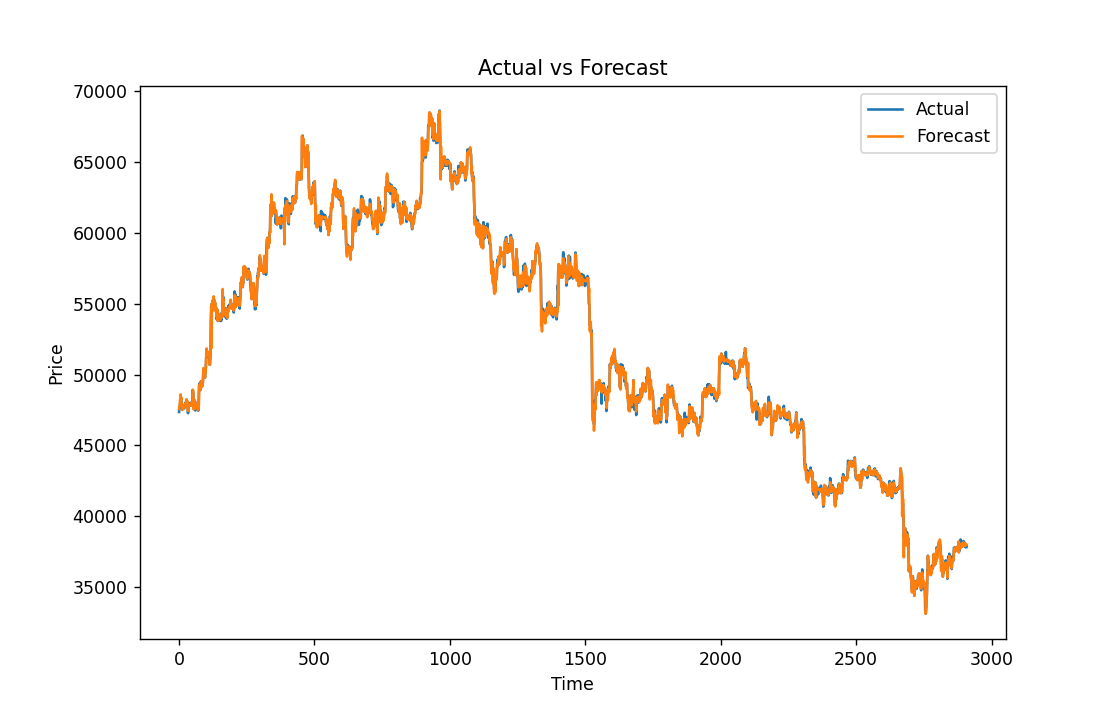

Ending Portfolio Value: 5010.14 USDT


<IPython.core.display.Javascript object>


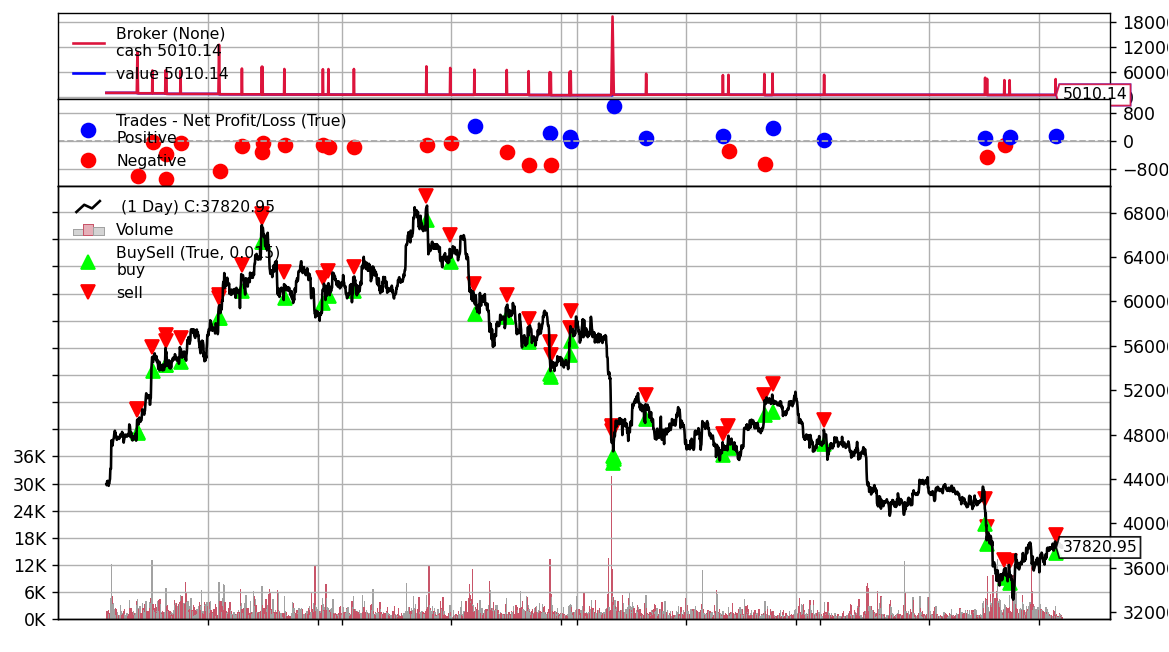

[[<Figure size 640x480 with 4 Axes>]]

In [87]:
print(f"Starting Portfolio Value: {cerebro.broker.getvalue():.2f} USDT")

cerebro.run()

print(f"Ending Portfolio Value: {cerebro.broker.getvalue():.2f} USDT")
